# Baseball Player Fingerprints Visualization

This notebook demonstrates how to create and visualize **binary fingerprints** for baseball players based on career batting statistics.  

**Overview of Steps:**
1. Load and preprocess player statistics data.
2. Generate quantile-based fingerprints for each player.
3. Apply dimensionality reduction techniques (PCA, t-SNE, UMAP) to project high-dimensional fingerprints into 2D space.
4. Visualize player fingerprints using scatter plots colored by statistics like Home Runs (HR) or OPS.
5. Explore patterns and clusters among top-performing players.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
from diamondfp.fingerprints import binaryfp
from diamondfp.utils.features import generate_quantiles

/home/dakota/anaconda3/envs/diamondfp/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load and Prepare Data

The career batting statistics CSV is loaded and cleaned by dropping any rows with missing values. We then focus on players with above-median OPS. Statistical features and quantile thresholds are defined to generate fingerprints that capture each player’s relative performance across multiple metrics. Finally, a binary fingerprint is computed for each player using these thresholds.

In [2]:
df = pd.read_csv("../data/career-batting.csv")
df = df.dropna()
df = df[df["OPS"] > np.quantile(df["OPS"], 0.5)]

stat_features = {
    "H": [0.5, 0.75, 0.9, 0.95],
    "2B": [0.75, 0.95],
    "3B": [0.75, 0.95],
    "HR": [0.9, 0.99],
    "K%": [0.1, 0.25],
    "BB%": [0.75, 0.99],
    "AVG": [0.5, 0.75, 0.9, 0.95],
    "OBP": [0.5, 0.75, 0.9, 0.95],
    "SLG": [0.5, 0.75, 0.9, 0.95],
    "OPS": [0.5, 0.75, 0.9, 0.95],
}

feat_quants = generate_quantiles(df, stat_features)
df['Fingerprint'] = df.apply(lambda x: binaryfp(x, feat_quants), axis=1)

## PCA Visualization

We convert the player fingerprints into a numeric array and apply Principal Component Analysis (PCA) to reduce the high-dimensional data to two components. The resulting coordinates are stored in a DataFrame along with player statistics. A scatter plot is created with the first principal component on the x-axis and the second on the y-axis, coloring points by Home Runs (HR) to highlight patterns in player performance.

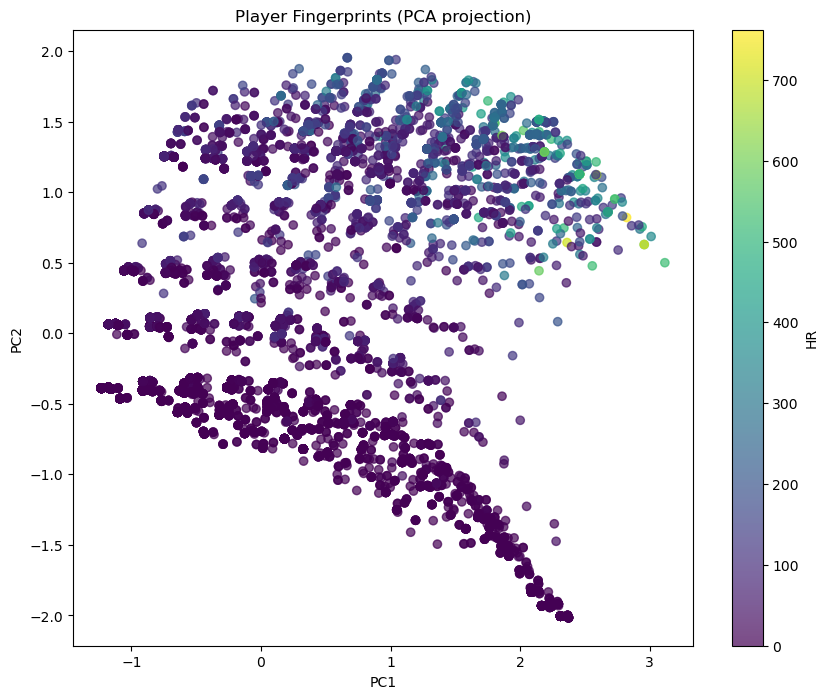

In [3]:
X = np.array(df["Fingerprint"].tolist(), dtype=float)
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

# Build a DataFrame for plotting
plot_df = pd.DataFrame({
    "x": coords[:, 0],
    "y": coords[:, 1],
    "player": df["Name"],
    "OPS": df["OPS"],
    "HR": df["HR"],
    "H": df["H"], 
})

# Scatter plot
plt.figure(figsize=(10, 8))
sc = plt.scatter(plot_df["x"], plot_df["y"], c=plot_df["HR"], cmap="viridis", alpha=0.7)
plt.colorbar(sc, label="HR")
plt.title("Player Fingerprints (PCA projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## t-SNE Visualization

To capture nonlinear relationships in the fingerprints, we apply t-distributed Stochastic Neighbor Embedding (t-SNE) and project the high-dimensional data into two dimensions. The coordinates are combined with player statistics for plotting. The scatter plot visualizes players with color indicating HR, helping identify clusters or similarities among players that PCA might not capture.

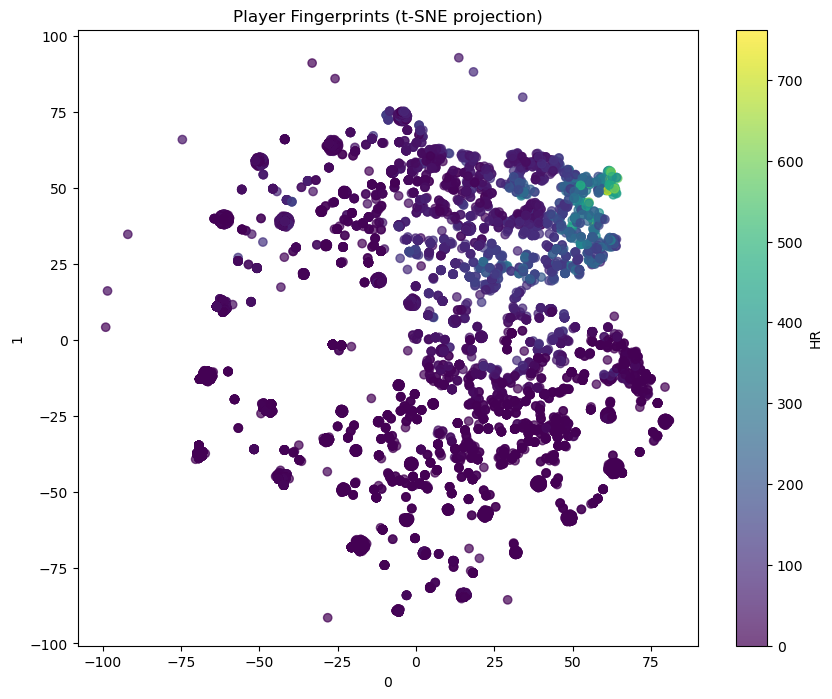

In [4]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
coords = tsne.fit_transform(X)

# Build a DataFrame for plotting
plot_df = pd.DataFrame({
    "x": coords[:, 0],
    "y": coords[:, 1],
    "player": df["Name"],
    "OPS": df["OPS"],
    "HR": df["HR"],
    "H": df["H"], 
})

# Scatter plot
plt.figure(figsize=(10, 8))
sc = plt.scatter(plot_df["x"], plot_df["y"], c=plot_df["HR"], cmap="viridis", alpha=0.7)
plt.colorbar(sc, label="HR")
plt.title("Player Fingerprints (t-SNE projection)")
plt.xlabel("0")
plt.ylabel("1")
plt.show()

## UMAP Visualization

UMAP is applied as another nonlinear dimensionality reduction method to project the fingerprints into 2D space. The coordinates are stored with player statistics for plotting, and a scatter plot is generated with HR as the color scale. UMAP often preserves local and global structure differently than t-SNE, offering a complementary perspective on player similarity.

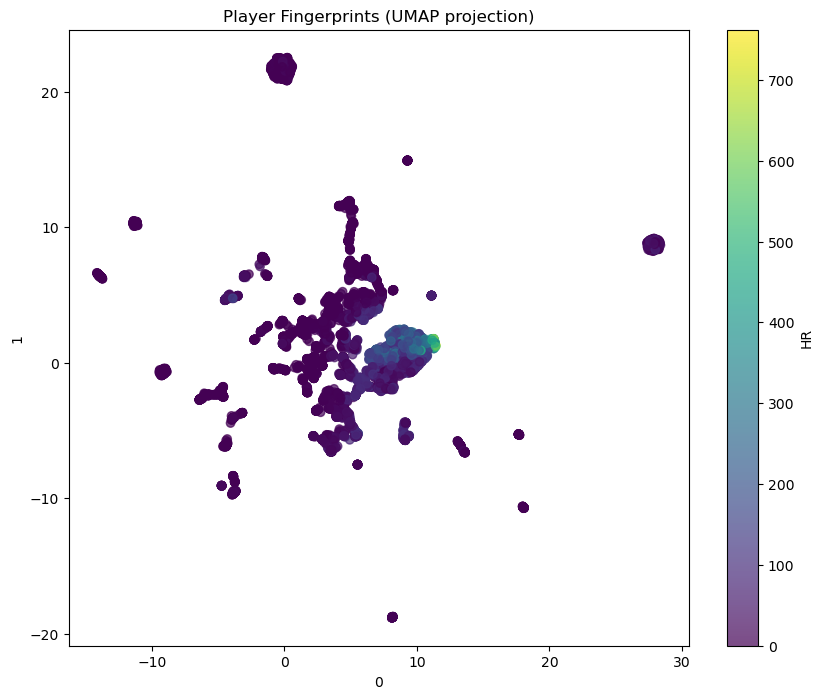

In [5]:
umap_model = UMAP(n_components=2, n_jobs=-1)
coords = umap_model.fit_transform(X)

# Build a DataFrame for plotting
plot_df = pd.DataFrame({
    "x": coords[:, 0],
    "y": coords[:, 1],
    "player": df["Name"],
    "OPS": df["OPS"],
    "HR": df["HR"],
    "H": df["H"], 
})

# Scatter plot
plt.figure(figsize=(10, 8))
sc = plt.scatter(plot_df["x"], plot_df["y"], c=plot_df["HR"], cmap="viridis", alpha=0.7)
plt.colorbar(sc, label="HR")
plt.title("Player Fingerprints (UMAP projection)")
plt.xlabel("0")
plt.ylabel("1")
plt.show()

## Next Steps

This notebook can be extended by exploring other statistics for coloring points, adding interactive plots using Plotly, or performing clustering to identify groups of similar players. These visualizations provide a foundation for understanding player performance patterns based on their fingerprints.
